In [1]:
!pip install -U layoutparser


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install "layoutparser[ocr]"
!pip install pytesseract opencv-python pillow


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: "'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'": Expected package name at the start of dependency specifier
    'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'
    ^
Hint: = is not a valid operator. Did you mean == ?


In [4]:
!pip install layoutparser[ocr]


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!git clone https://github.com/Layout-Parser/layout-parser.git

fatal: destination path 'layout-parser' already exists and is not an empty directory.


In [6]:
%cd layout-parser/

e:\Research Vision\research-vision\notebooks\layout-parser


C:\Users\paara\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
import cv2

image_with_formulas = cv2.imread(r"E:\Research Vision\research-vision\outputs\pages\page_003.png")
image_with_formulas = image_with_formulas[..., ::-1] # Convert BGR to RGB

image_without_formulas = cv2.imread(r"E:\Research Vision\research-vision\outputs\pages\page_006.png")
image_without_formulas = image_without_formulas[..., ::-1] # Convert BGR to RGB

print("Images loaded: image_with_formulas and image_without_formulas")

Images loaded: image_with_formulas and image_without_formulas


In [8]:
# Uninstall current Pillow version and install a compatible one for detectron2
!pip uninstall -y Pillow
!pip install Pillow==9.5.0

# IMPORTANT: After running this cell, please restart your Python runtime
# (Runtime -> Restart runtime...) for the changes to take effect.

Found existing installation: Pillow 9.5.0
Uninstalling Pillow-9.5.0:
  Successfully uninstalled Pillow-9.5.0
  Using cached Pillow-9.5.0-cp312-cp312-win_amd64.whl.metadata (9.7 kB)
Using cached Pillow-9.5.0-cp312-cp312-win_amd64.whl (2.5 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.14 requires protobuf<5,>=4.25.3, but you have protobuf 3.20.3 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Layout for diagrams and text

Base dir: e:/Research Vision/research-vision/notebooks
Config path: e:/Research Vision/research-vision/notebooks/models/config.yaml
Weights path: e:/Research Vision/research-vision/notebooks/models/model_final.pth
Config exists: True
Weights exists: True


c:\Users\paara\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\paara\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4316.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


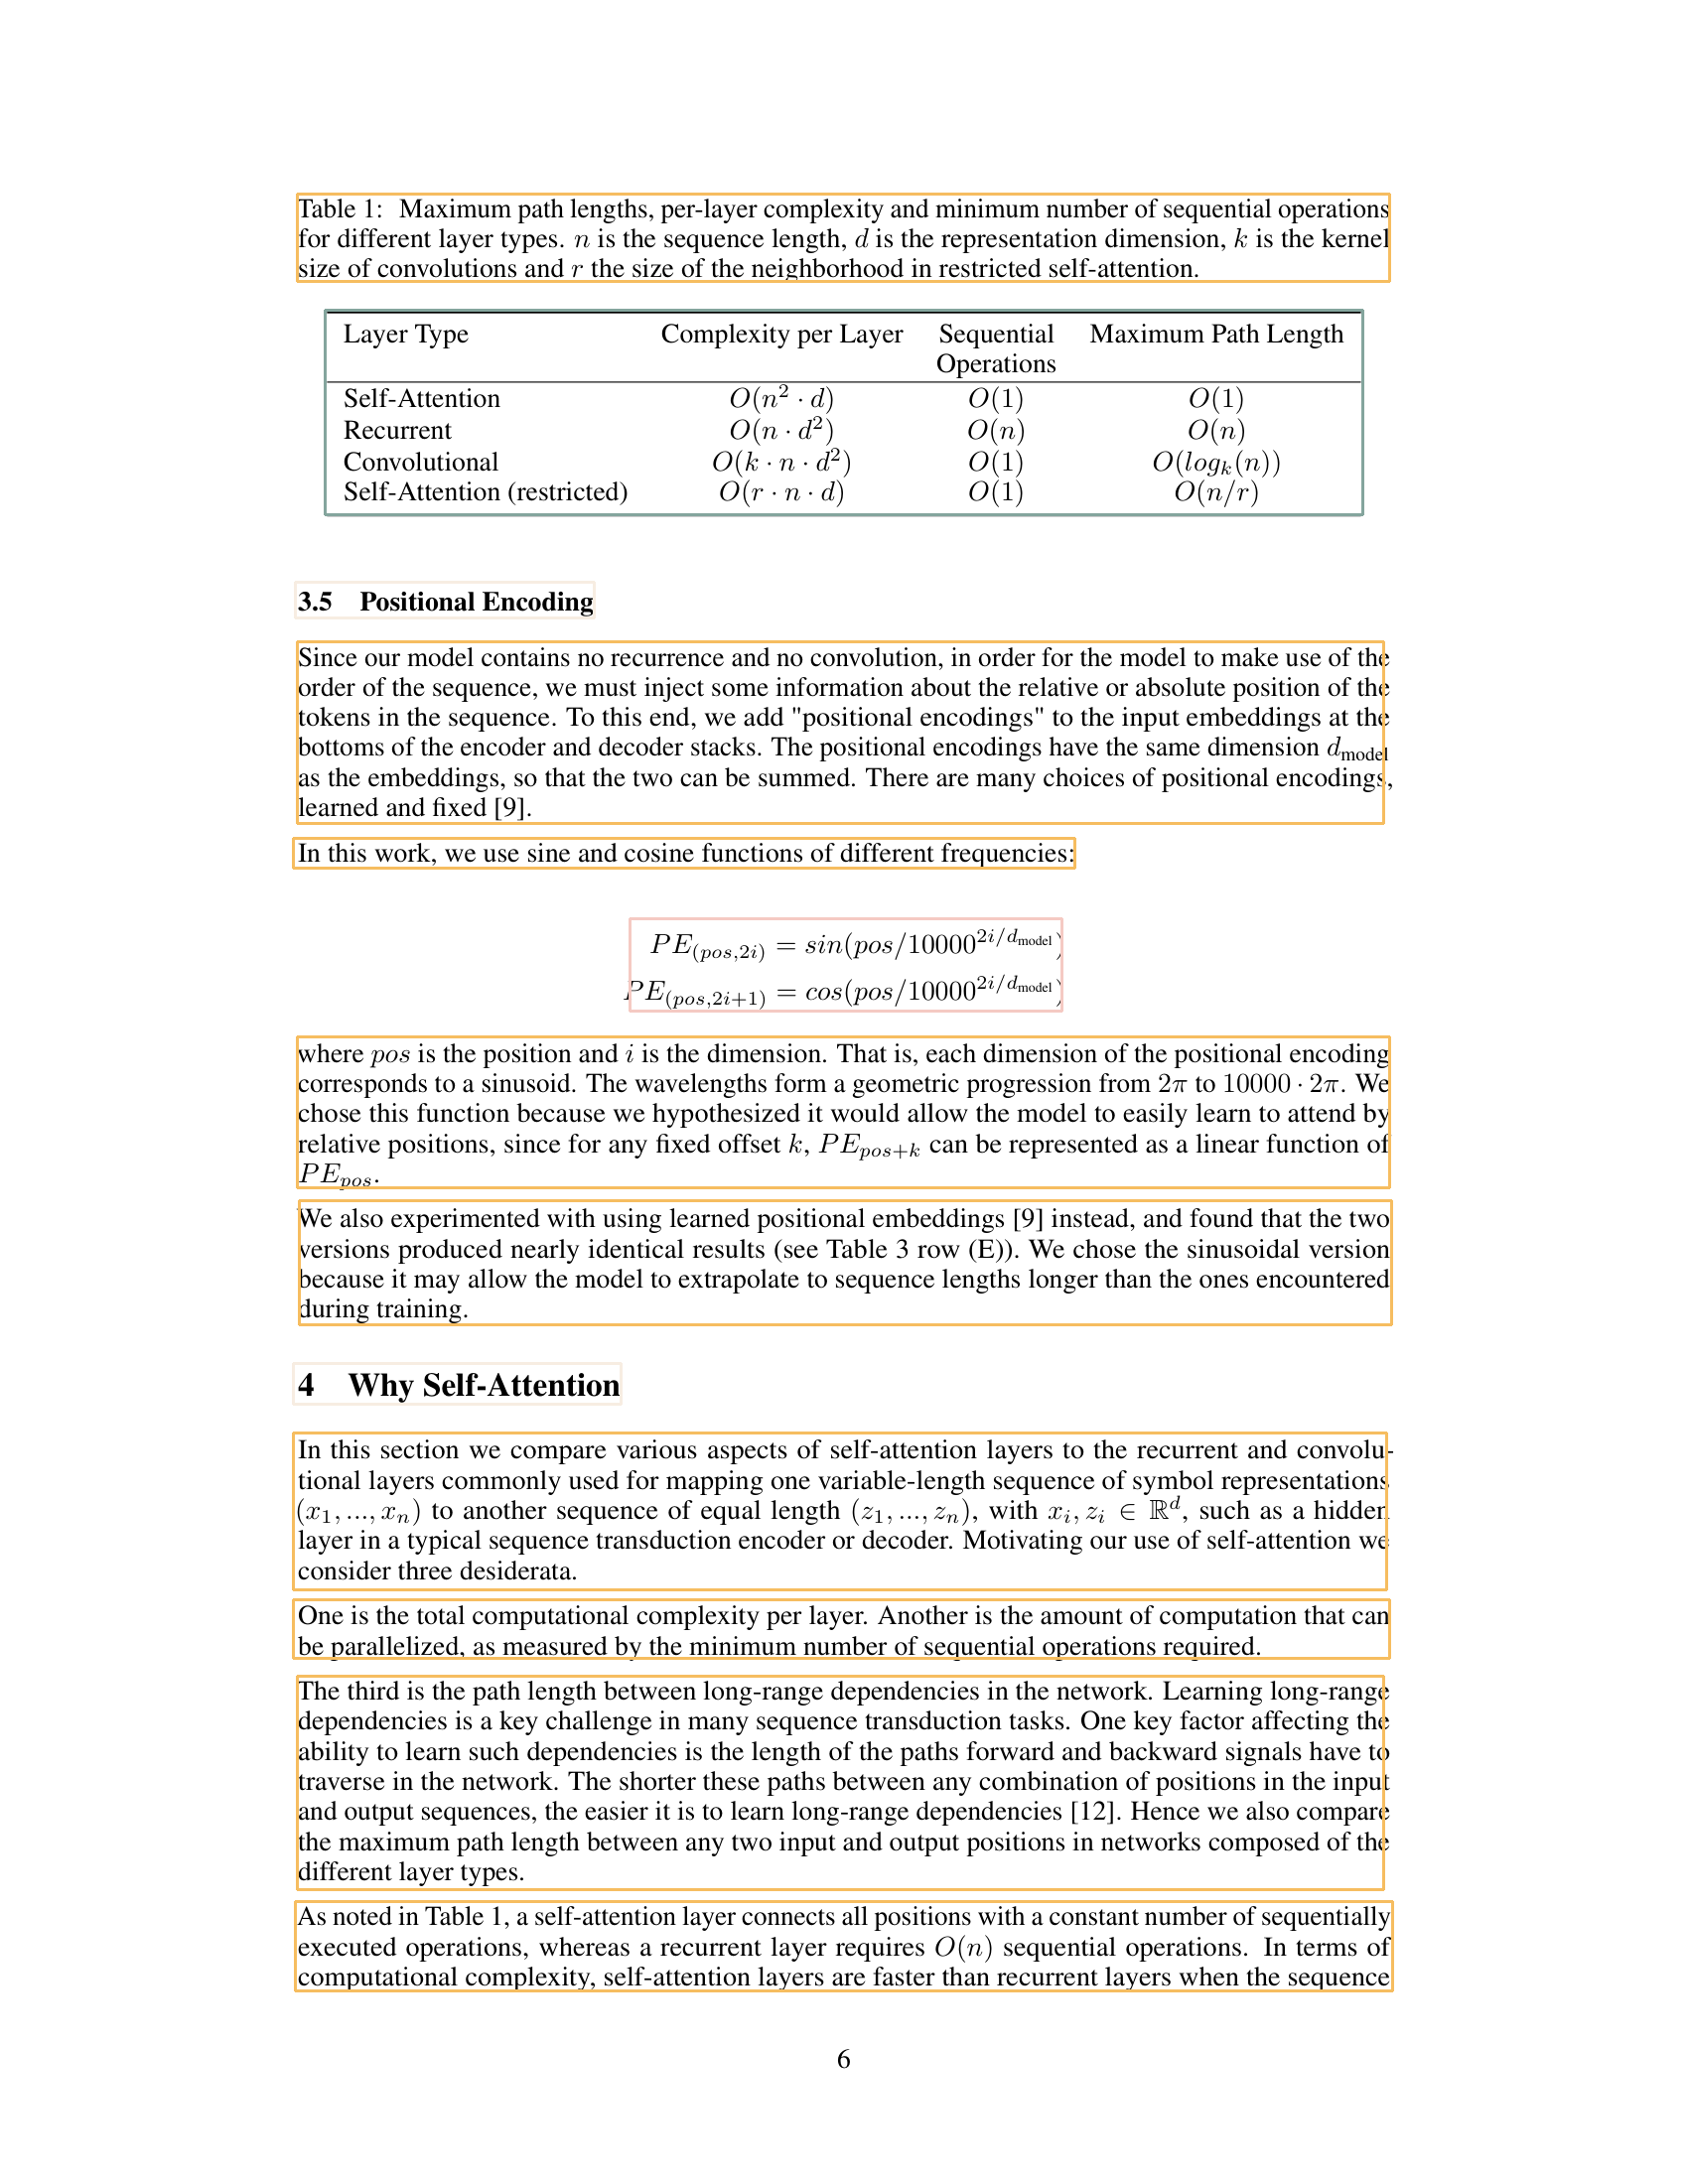


--- OCR Results ---

Detected Text:
The third is the path length between long-range dependencies in the network. Learning long-range
dependencies is a key challenge in many sequence transduction tasks. One key factor affecting the
ability to learn such dependencies is the length of the paths forward and backward signals have to
traverse in the network. The shorter these paths between any combination of positions in the input
and output sequences, the easier it is to learn long-range dependencies [12]. Hence we also compare

the maximum path length between any two input and output positions in networks composed of the
different layer types.

--------------------
Detected Text:
Since our model contains no recurrence and no convolution, in order for the model to make use of the
order of the sequence, we must inject some information about the relative or absolute position of the
tokens in the sequence. To this end, we add "positional encodings" to the input embeddings at the
bottoms of th

In [9]:
import layoutparser as lp
import os
import pytesseract

# Use absolute paths to the models directory
base_dir = r"e:/Research Vision/research-vision/notebooks"
model_config_path = f"{base_dir}/models/config.yaml"
model_weights_path = f"{base_dir}/models/model_final.pth"
label_map = {0: "Text", 1: "Title", 2: "List", 3: "Table", 4: "Figure"}

print(f"Base dir: {base_dir}")
print(f"Config path: {model_config_path}")
print(f"Weights path: {model_weights_path}")
print(f"Config exists: {os.path.exists(model_config_path)}")
print(f"Weights exists: {os.path.exists(model_weights_path)}")

model = lp.Detectron2LayoutModel(
    config_path=model_config_path,
    model_path=model_weights_path,
    extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
    label_map=label_map
)

layout = model.detect(image_without_formulas)
drawn_layout_image = lp.draw_box(image_without_formulas, layout, box_width=3)
display(drawn_layout_image)

# OCR Extraction
print("\n--- OCR Results ---\n")
text_blocks = lp.Layout([b for b in layout if b.type == 'Text'])
for block in text_blocks:
    segment_image = (block
                   .pad(left=5, right=5, top=5, bottom=5)
                   .crop_image(image_without_formulas))
    text = pytesseract.image_to_string(segment_image)
    print(f"Detected Text:\n{text}\n{'-'*20}")